In [12]:
import numpy as np
import os
import re
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
folder = 'Log/'
folder1 = 'Log1/'
folder2 = 'Log2/'
folder3 = 'Log3/'
folder4 = 'Log5/'

files = sorted(os.listdir(folder))

def create_log(folder):
    files = sorted(os.listdir(folder))
    dt = {}
    for f in files:    
        dt[f] = None
    
    for f in files:
        with open(folder+f) as f1:
            lines = f1.readlines()
            req = []
            recv_token = []
            for l in lines:
                if 'want a token' in l:
                    req.append(re.split(' |:',l)[:2])
                elif 'got a token' in l:
                    recv_token.append(re.split(' |:',l)[:2])
                    
            a = np.zeros((len(recv_token),2))
            for i in range(len(recv_token)):
                reqt = np.float64(req[i][0]) + np.float64(req[i][1])/60
                recvt = np.float64(recv_token[i][0]) + np.float64(recv_token[i][1])/60
                a[i] = (reqt, recvt)
                
            dt[f] = a
                    
    return dt
    


In [3]:
dt1 = create_log(folder)


In [4]:
dt2 = create_log(folder1)


In [5]:
dt3 = create_log(folder2)



In [6]:
dt4 = create_log(folder3)

In [7]:
dt5 = create_log(folder4)

In [18]:
def find_mean(dt1):
    avg = []
    for key in dt1:
        val = dt1[key]
        diff = val[:,1] - val[:,0]
        diff_n = []
        for d in diff:
            if d<0:
                diff_n.append(d+60)
            else:
                diff_n.append(d)
            
        diff = np.array(diff_n).astype(np.float64)
#         print(diff)
        avg.append(np.mean(diff))

    avg = np.array(avg)
    avg = np.mean(avg)
    return avg


# Np = 3
avg1 = find_mean(dt1)
print(avg1)
# Np = 5
avg2 = find_mean(dt2)
print(avg2)
# Np = 8
avg3 = find_mean(dt3)
print(avg3)
# Np = 15
avg4 = find_mean(dt4)
print(avg4)
# Np = 20
avg5 = find_mean(dt5)
print(avg5)


0.08696589523914657
0.20407999431656704
0.3659964225589226
0.7768228031953526
1.0694601806239736


In [19]:
def find_max(dt1):
    avg = []
    for key in dt1:
        val = dt1[key]
        diff = val[:,1] - val[:,0]
        diff_n = []
        for d in diff:
            if d<0:
                diff_n.append(d+60)
            else:
                diff_n.append(d)
            
        diff = np.array(diff_n).astype(np.float64)
#         print(diff)
        avg.append(np.max(diff))

    avg = np.array(avg)
    avg = np.max(avg)
    return avg


# Np = 3
mx1 = find_max(dt1)
print(mx1)
# Np = 5
mx2 = find_max(dt2)
print(mx2)
# Np = 8
mx3 = find_max(dt3)
print(mx3)
# Np = 15
mx4 = find_max(dt4)
print(mx4)
# Np = 20
mx5 = find_max(dt5)
print(mx5)


0.21666666666666146
0.2833333333333332
0.46666666666666856
0.9500000000000028
1.25


In [20]:
def find_min(dt1):
    avg = []
    for key in dt1:
        val = dt1[key]
        diff = val[:,1] - val[:,0]
        diff_n = []
        for d in diff:
            if d<0:
                diff_n.append(d+60)
            else:
                diff_n.append(d)
            
        diff = np.array(diff_n).astype(np.float64)
#         print(diff)
        avg.append(np.min(diff))

    avg = np.array(avg)
    avg = np.min(avg)
    return avg


# Np = 3
mn1 = find_min(dt1)
print(mn1)
# Np = 5
mn2 = find_min(dt2)
print(mn2)
# Np = 8
mn3 = find_min(dt3)
print(mn3)

# Np = 15
mn4 = find_min(dt4)
print(mn4)

# Np = 20
mn5 = find_min(dt5)
print(mn5)


0.01666666666666572
0.04999999999999716
0.06666666666666643
0.01666666666666572
0.03333333333333144


Text(0, 0.5, 'Time')

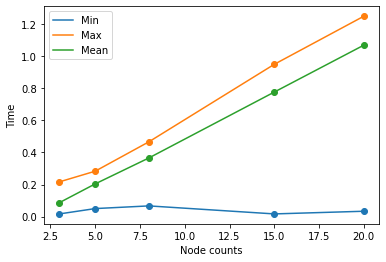

In [25]:
sns.lineplot(x=[3, 5, 8, 15, 20], y=[mn1, mn2, mn3, mn4, mn5])
sns.lineplot(x=[3, 5, 8, 15, 20], y=[mx1, mx2, mx3, mx4, mx5])
sns.lineplot(x=[3, 5, 8, 15, 20], y=[avg1, avg2, avg3, avg4, avg5])
plt.scatter(x=[3, 5, 8, 15, 20], y=[mn1, mn2, mn3, mn4, mn5])
plt.scatter(x=[3, 5, 8, 15, 20], y=[mx1, mx2, mx3, mx4, mx5])
plt.scatter(x=[3, 5, 8, 15, 20], y=[avg1, avg2, avg3, avg4, avg5])
plt.legend(labels=["Min","Max", "Mean"])
plt.xlabel("Node counts")
plt.ylabel("Time")

Text(0, 0.5, 'Time')

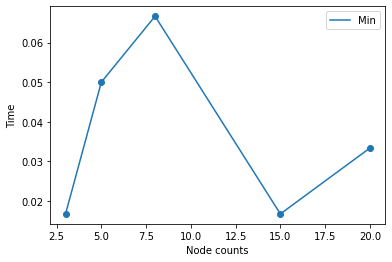

In [26]:
sns.lineplot(x=[3, 5, 8, 15, 20], y=[mn1, mn2, mn3, mn4, mn5])
plt.scatter(x=[3, 5, 8, 15, 20], y=[mn1, mn2, mn3, mn4, mn5])
plt.legend(labels=["Min"])
plt.xlabel("Node counts")
plt.ylabel("Time")

Text(0, 0.5, 'Time')

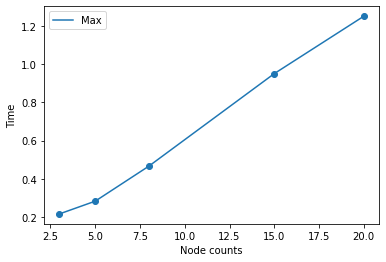

In [30]:

sns.lineplot(x=[3, 5, 8, 15, 20], y=[mx1, mx2, mx3, mx4, mx5])
plt.scatter(x=[3, 5, 8, 15, 20], y=[mx1, mx2, mx3, mx4, mx5])
plt.legend(labels=["Max"])
plt.xlabel("Node counts")
plt.ylabel("Time")

Text(0, 0.5, 'Time')

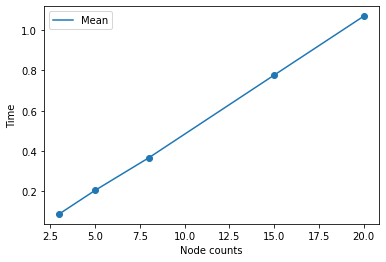

In [28]:

sns.lineplot(x=[3, 5, 8, 15, 20], y=[avg1, avg2, avg3, avg4, avg5])
plt.scatter(x=[3, 5, 8, 15, 20], y=[avg1, avg2, avg3, avg4, avg5])
plt.legend(labels=[ "Mean"])
plt.xlabel("Node counts")
plt.ylabel("Time")